<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-05 19:59:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.6MB/s    in 2.6s    

2025-09-05 19:59:08 (59.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])
      


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


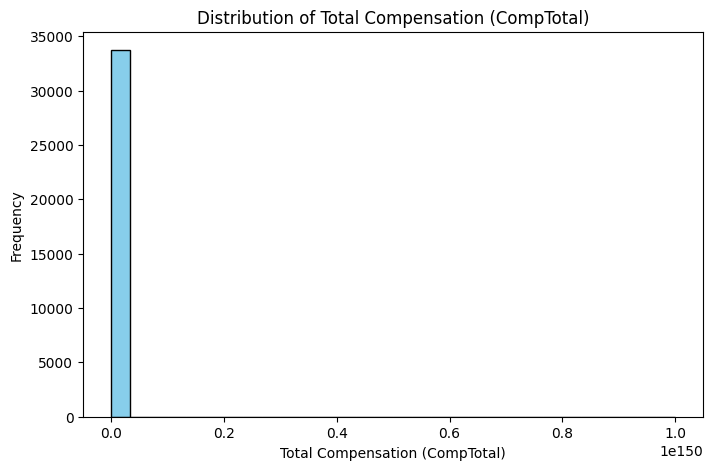

In [12]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Query CompTotal column from the SQLite table
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL;"
df_comp = pd.read_sql_query(query, conn)  # conn = your sqlite3 connection
# Plot histogram of CompTotal
plt.figure(figsize=(8,5))
plt.hist(df_comp['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Total Compensation (CompTotal)")
plt.ylabel("Frequency")
plt.title("Distribution of Total Compensation (CompTotal)")
plt.show()


**Box Plots**

Plot a box plot of Age.


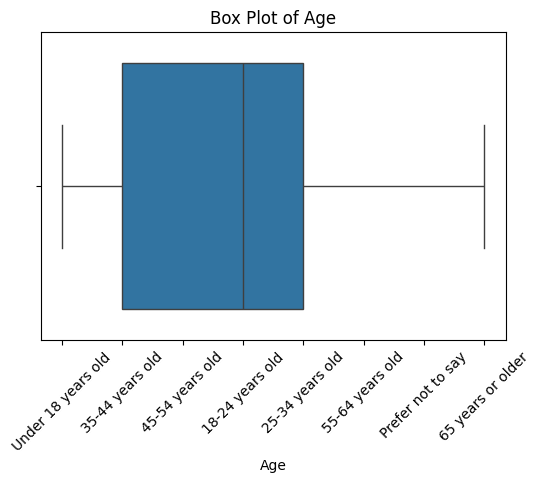

In [3]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Load dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Create SQLite connection
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, if_exists="replace", index=False)
# Create SQLite connection
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, if_exists="replace", index=False)

# Query the Age column using SQL
query = "SELECT Age FROM survey WHERE Age IS NOT NULL"
age_data = pd.read_sql_query(query, conn)

# Plot a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=age_data["Age"])
plt.title("Box Plot of Age")
plt.xticks(rotation=45)  # rotate labels if needed
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


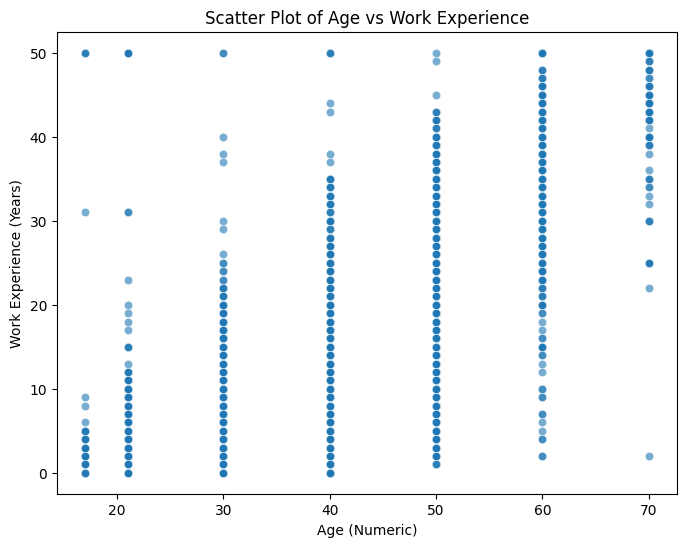

In [8]:
## Write your code here

# Query Age and WorkExp columns using SQL
query = "SELECT Age, WorkExp FROM survey WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"
scatter_data = pd.read_sql_query(query, conn)
# Map Age categories to numeric midpoints
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

scatter_data["AgeNumeric"] = scatter_data["Age"].map(age_mapping)

# Plot scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=scatter_data, x="AgeNumeric", y="WorkExp", alpha=0.6)
plt.title("Scatter Plot of Age vs Work Experience")
plt.xlabel("Age (Numeric)")
plt.ylabel("Work Experience (Years)")
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


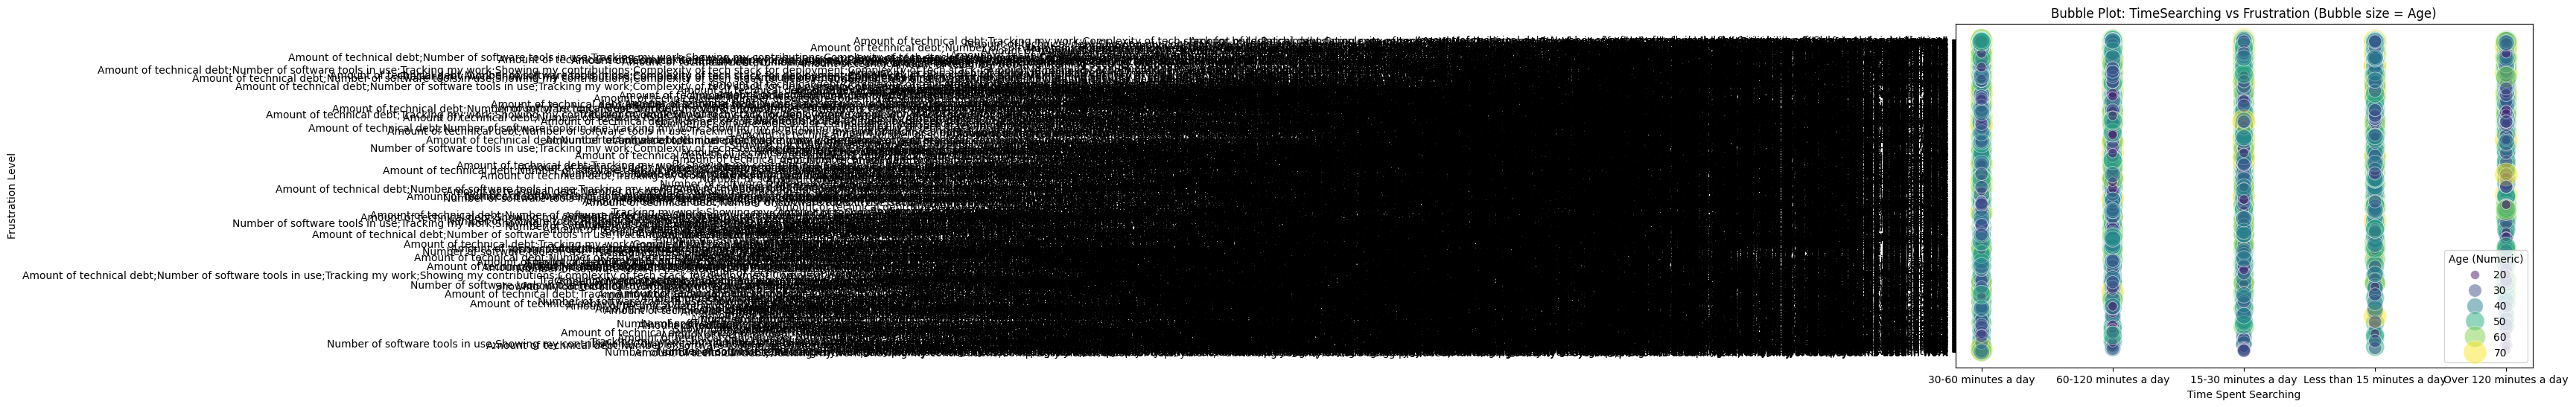

In [9]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
# Create SQLite connection
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, if_exists="replace", index=False)
# Create SQLite connection
conn = sqlite3.connect(":memory:")
df.to_sql("survey", conn, if_exists="replace", index=False)

# Query relevant columns
query = "SELECT Age, TimeSearching, Frustration FROM survey WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL"
bubble_data = pd.read_sql_query(query, conn)

# Map Age categories to numeric midpoints for bubble sizes
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

bubble_data["AgeNumeric"] = bubble_data["Age"].map(age_mapping)

# Plot bubble plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=bubble_data, 
    x="TimeSearching", 
    y="Frustration", 
    size="AgeNumeric", 
    sizes=(50, 500),   # min and max bubble sizes
    alpha=0.5, 
    hue="AgeNumeric",  # optional: color by Age
    palette="viridis"
)

plt.title("Bubble Plot: TimeSearching vs Frustration (Bubble size = Age)")
plt.xlabel("Time Spent Searching")
plt.ylabel("Frustration Level")
plt.legend(title="Age (Numeric)")
plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


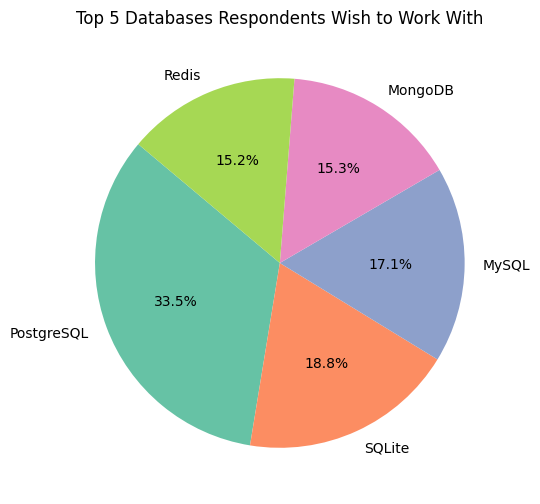

In [10]:
## Write your code here
# Query DatabaseWantToWorkWith
query = "SELECT DatabaseWantToWorkWith FROM survey WHERE DatabaseWantToWorkWith IS NOT NULL"
db_data = pd.read_sql_query(query, conn)

# Split multiple databases in a single row
db_split = db_data['DatabaseWantToWorkWith'].str.split(';').explode()

# Count frequency of databases
top5_db = db_split.value_counts().head(5)

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(top5_db, labels=top5_db.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Top 5 Databases Respondents Wish to Work With")
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


Median TimeSearching for age group 30-35: nan
Median TimeAnswering for age group 30-35: nan


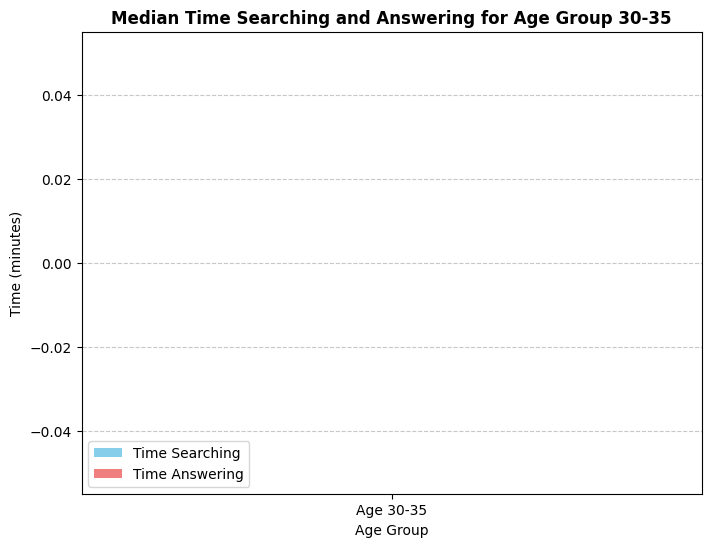

In [16]:
## Write your code here
# Query relevant columns
query = "SELECT Age, TimeSearching, TimeAnswering FROM survey WHERE Age IS NOT NULL"
time_data = pd.read_sql_query(query, conn)

# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)
_# Convert the 'Age' column to a numeric data type
# The 'errors=coerce' argument will turn any non-numeric values into NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop any rows where 'Age' is NaN (these were non-numeric originally)
df.dropna(subset=['Age'], inplace=True)

# Filter the DataFrame for the age group 30 to 35
age_group_df = df[(df['Age'] >= 30) & (df['Age'] <= 35)].copy()

# Calculate the median for TimeSearching and TimeAnswering
median_time_searching = age_group_df['TimeSearching'].median()
median_time_answering = age_group_df['TimeAnswering'].median()

print(f"Median TimeSearching for age group 30-35: {median_time_searching}")
print(f"Median TimeAnswering for age group 30-35: {median_time_answering}")

# Create the stacked bar chart
plt.figure(figsize=(8, 6))

labels = ['Age 30-35']
plt.bar(labels, median_time_searching, label='Time Searching', color='skyblue')
plt.bar(labels, median_time_answering, bottom=median_time_searching, label='Time Answering', color='lightcoral')

# Add titles and labels for clarity
plt.title('Median Time Searching and Answering for Age Group 30-35', fontweight='bold')
plt.xlabel('Age Group')
plt.ylabel('Time (minutes)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

 


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


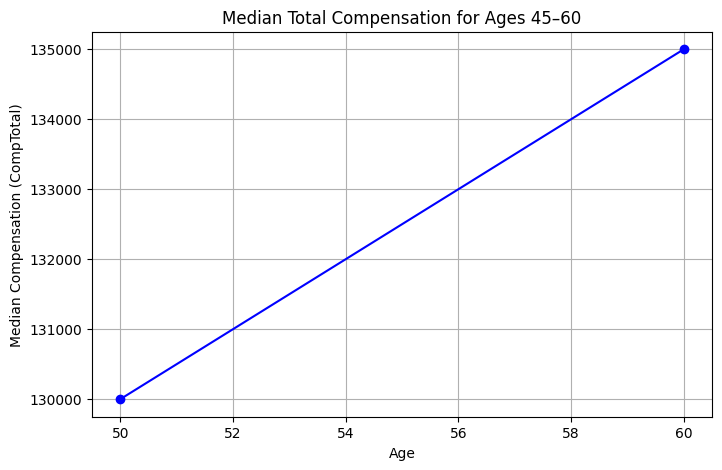

In [13]:
## Write your code here
# Query Age and CompTotal
query = "SELECT Age, CompTotal FROM survey WHERE CompTotal IS NOT NULL AND Age IS NOT NULL"
comp_data = pd.read_sql_query(query, conn)

# Map age groups to numeric midpoints
age_map = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
comp_data["AgeNumeric"] = comp_data["Age"].map(age_map)

# Filter ages between 45 and 60
age_filtered = comp_data[(comp_data["AgeNumeric"] >= 45) & (comp_data["AgeNumeric"] <= 60)]

# Group by Age and compute median
median_comp = age_filtered.groupby("AgeNumeric")["CompTotal"].median()

# Plot Line Chart
plt.figure(figsize=(8,5))
plt.plot(median_comp.index, median_comp.values, marker="o", linestyle="-", color="b")
plt.title("Median Total Compensation for Ages 45–60")
plt.xlabel("Age")
plt.ylabel("Median Compensation (CompTotal)")
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


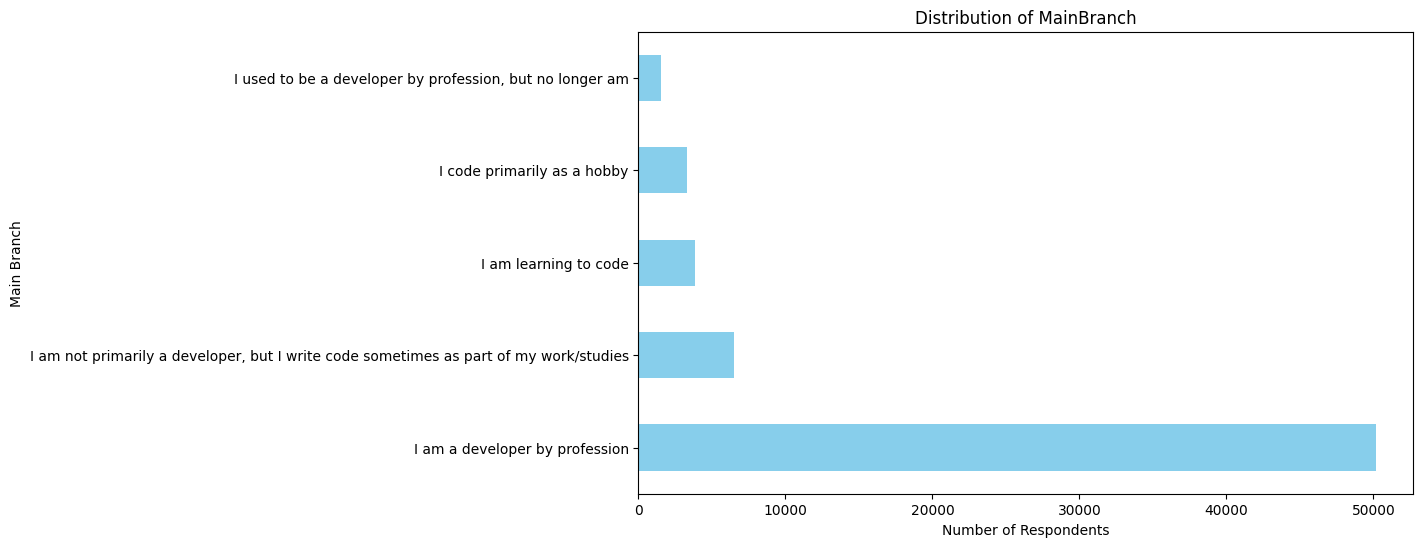

In [14]:
## Write your code here
# Query MainBranch
query = "SELECT MainBranch FROM survey WHERE MainBranch IS NOT NULL"
branch_data = pd.read_sql_query(query, conn)

# Count responses by MainBranch
branch_counts = branch_data['MainBranch'].value_counts()

# Plot Horizontal Bar Chart
plt.figure(figsize=(10,6))
branch_counts.plot(kind="barh", color="skyblue")
plt.title("Distribution of MainBranch")
plt.xlabel("Number of Respondents")
plt.ylabel("Main Branch")
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
